# 10.437 Final Project
Here we're going to do geometry optimization on water and CO2 with a janky Hartree-Fock implementation I did using the Psi4 library. Then we'll compute the Hessian of the energy surface around the optimal geometry to compute mode frequencies.

In [7]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

### CO2 optimization

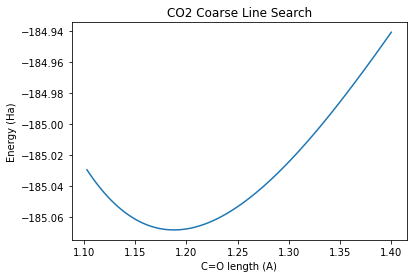

In [8]:
coarseco2 = pd.read_csv("co2line_coarse.csv")
plt.plot(coarseco2['length'], coarseco2['energy'])
plt.title("CO2 Coarse Line Search")
plt.xlabel("C=O length (A)")
plt.ylabel("Energy (Ha)")
plt.show()

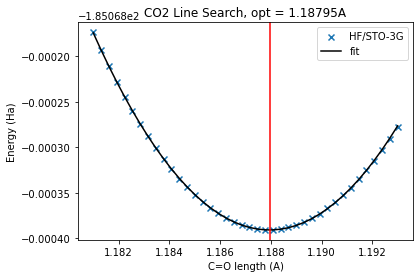

In [22]:
def quad(x, a, b, c):
    return a*x**2 + b*x + c
fineco2 = pd.read_csv("co2line_fine.csv")
plt.scatter(fineco2['length'], fineco2['energy'], marker='x', label='HF/STO-3G')
opt, cov = scipy.optimize.curve_fit(quad, fineco2['length'], fineco2['energy'])
plt.plot(fineco2['length'], quad(fineco2['length'], opt[0], opt[1], opt[2]), color='k', label='fit')

fit_min = -opt[1] / (2*opt[0])
plt.axvline(fit_min, color='red')

plt.legend()
plt.title(f"CO2 Line Search, opt = {fit_min:.5f}A")
plt.xlabel("C=O length (A)")
plt.ylabel("Energy (Ha)")
#plt.savefig('CO2_line.png', dpi=200)
plt.show()